<a href="https://colab.research.google.com/github/Gilade98/Machine_Learning_Projects/blob/main/The_DS_Toolbox/Ex7_Graphs_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework Assignment 7

**Question 1:** Select three books and construct networks of people and locations, i.e. each link is between a a person and a location (20pt). Visualize the network using Cytoscape, Gephi, or any other Graph Visualization tool (20pt).


In [ ]:
!pip install kaggle
!pip install spaCy
!pip install afinn
!pip install nltk
!pip install plotly
!pip install bertopic
!pip install transformers
!pip install catboost
import nltk
nltk.download('stopwords')
nltk.download('punkt')

!python -m spacy download en_core_web_lg # Important! you need to restart runtime after install

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53429 sha256=cf2e22af802fe3fef4bc60988079c4635b7262cc5cefdadb314b2058aa59e81a
  Stored in directory: /root/.cache/pip/wheels/b0/05/90/43f79196199a138fb486902fceca30a2d1b5228e6d2db8eb90
Successfully built afinn
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 90.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.3 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 2.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import kaggle
!mkdir ./datasets
!mkdir ./datasets/dickens

# download the dataset from Kaggle and unzip it
!kaggle datasets download fuzzyfroghunter/dickens -p ./datasets/
!unzip ./datasets/dickens.zip  -d ./datasets/

Dataset URL: https://www.kaggle.com/datasets/fuzzyfroghunter/dickens
License(s): other
 75% 7.00M/9.28M [00:00<00:00, 70.9MB/s]
100% 9.28M/9.28M [00:00<00:00, 85.0MB/s]
Archive:  ./datasets/dickens.zip
  inflating: ./datasets/dickens/1289-0.txt  
  inflating: ./datasets/dickens/1400-0.txt  
  inflating: ./datasets/dickens/1467-0.txt  
  inflating: ./datasets/dickens/27924-0.txt  
  inflating: ./datasets/dickens/564-0.txt  
  inflating: ./datasets/dickens/580-0.txt  
  inflating: ./datasets/dickens/644-0.txt  
  inflating: ./datasets/dickens/650-0.txt  
  inflating: ./datasets/dickens/653-0.txt  
  inflating: ./datasets/dickens/675-0.txt  
  inflating: ./datasets/dickens/678-0.txt  
  inflating: ./datasets/dickens/700-0.txt  
  inflating: ./datasets/dickens/766-0.txt  
  inflating: ./datasets/dickens/786-0.txt  
  inflating: ./datasets/dickens/807-0.txt  
  inflating: ./datasets/dickens/882-0.txt  
  inflating: ./datasets/dickens/883-0.txt  
  inflating: ./datasets/dickens/914-0.txt  
 

In [ ]:
import spacy
nlp = spacy.load('en_core_web_lg')
datasets_path = "./datasets/dickens"


def get_entites_dict_from_text(text):
    entities_dict= {}
    #using spaCy to get entities
    doc = nlp(text)
    for entity in doc.ents:
        label = entity.label_
        e = entity.text.lower()
        if  label not in entities_dict:
            entities_dict[label] = {}
        if e not in entities_dict[label]:
            entities_dict[label][e] = 0
        entities_dict[label][e] += 1
    return entities_dict

def get_book_entities(path, person_min_times, other_entities_min_times=1):
    txt = open(path,"r", encoding="utf8", errors="ignore").read()
    txt = txt.replace("\n", " ")
    doc = nlp(txt)
    d = get_entites_dict_from_text(txt)
    entities_dict = {}
    for k in d.keys():
        min_times = other_entities_min_times
        if k == "PERSON":
            min_times = person_min_times
        entity_dict = {k:v for k,v in d[k].items() if v>min_times}
        entities_dict[k] = entity_dict
    return entities_dict


In [ ]:
from tqdm import tqdm


def get_persons_loc_links(txt):

    links_set = set()
    doc = nlp(txt)
    l = [entity.text.lower().strip() for entity in doc.ents if entity.label_ == "PERSON"]
    locations = [entity.text.lower().strip() for entity in doc.ents if entity.label_ == "LOC" or entity.label_ == "GPE" ]

    for e1 in l:
        for e2 in locations:
            links_set.add((e1,e2))

    return links_set

def get_edges(path):
  txt = open(path).read()
  paragraphs_list = txt.split("\n\n")
  links_list = []
  for para in tqdm(paragraphs_list):
      # for each paragraph each link counts only once
      links_list += list(get_persons_loc_links(para))

  return links_list

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def get_graph(edges):
  G = nx.Graph()
  G.add_edges_from(edges)
  return G

def visualiuzation(G, edges):
    v1_nodes = {edge[0] for edge in edges}
    # Red for people
    node_colors = ['red' if node in v1_nodes else 'blue' for node in G.nodes()]

    plt.figure(figsize=(20, 20))
    nx.draw_kamada_kawai(G, with_labels=True, node_color=node_colors)
    plt.show()


Book 1

In [ ]:
book1_path = "/content/datasets/dickens/27924-0.txt"
entities_dict = get_book_entities(book1_path, 20)
entities_dict

{'ORG': {'mugby junction': 3,
  'the project gutenberg license': 2,
  'barbox': 4,
  'branch': 9,
  'house': 2,
  'signal': 3,
  'skirmishun': 2,
  'barbox brothers': 61,
  'phœbe': 21,
  'beatrice': 3,
  'circus': 2,
  'missis': 22,
  'company': 3,
  'the compensation house': 2,
  'workbox': 3,
  'masey': 3,
  'fazeley': 4,
  'state': 4,
  'general post': 5,
  'eaton': 6,
  'post': 2,
  'chadleigh': 4,
  'the marchese loredano': 2,
  'foundation': 10,
  '1.e.8': 3,
  'the project gutenberg literary archive foundation': 11,
  'project gutenberg': 2},
 'PERSON': {'polly': 63,
  'sniff': 25,
  'forbes': 21,
  'project gutenberg-tm': 43},
 'DATE': {'years': 5,
  'the days': 2,
  'day': 4,
  'morrow': 6,
  'the day': 10,
  'next day': 2,
  'the previous day': 2,
  'good day': 3,
  'some days': 2,
  'autumn': 2,
  'this day': 3,
  'may': 4,
  'yesterday': 4,
  'weeks': 2,
  'december': 2,
  'one day': 3,
  'daily': 2,
  'these few weeks': 3,
  'the first day': 2,
  'three-quarters': 2,
  'a

In [ ]:
edges_book1 = get_edges(book1_path)
edges_book1

100%|██████████| 1090/1090 [00:18<00:00, 58.87it/s]


[('charles dickens', 'charles'),
 ('charles dickens', 'london'),
 ('chambermaid', 'constantinopolitan'),
 ('polly', 'constantinopolitan'),
 ('lamps', 'jupiter'),
 ('bandolining', 'wicer warsaw'),
 ('sherry', 'wicer warsaw'),
 ('jee-rusalemm', 'the atlantic ocean'),
 ('refreshmenting', 'the atlantic ocean'),
 ('yewer', 'britannia'),
 ('jee-rusalemm', 'the isle of the brave and land of the free'),
 ('refreshmenting', 'the isle of the brave and land of the free'),
 ('yewer', 'italy'),
 ('wheerfur', 'east'),
 ('yew', 'the isle of the brave and land of the free'),
 ('refreshmenting', 'dew'),
 ('jee-rusalemm', 'dew'),
 ('yew', 'the atlantic ocean'),
 ('refreshmenting', 'europe'),
 ('sherry', 'the isle of the brave and land of the free'),
 ('jee-rusalemm', 'europe'),
 ('sherry', 'the atlantic ocean'),
 ('jee-rusalemm', 'britannia'),
 ('refreshmenting', 'britannia'),
 ('yew', 'dew'),
 ('jee-rusalemm', 'italy'),
 ('refreshmenting', 'italy'),
 ('wheerfur', 'the atlantic ocean'),
 ('yew', 'europe

In [ ]:
g_book1 = get_graph(edges_book1)
print(g_book1)

Graph with 123 nodes and 198 edges


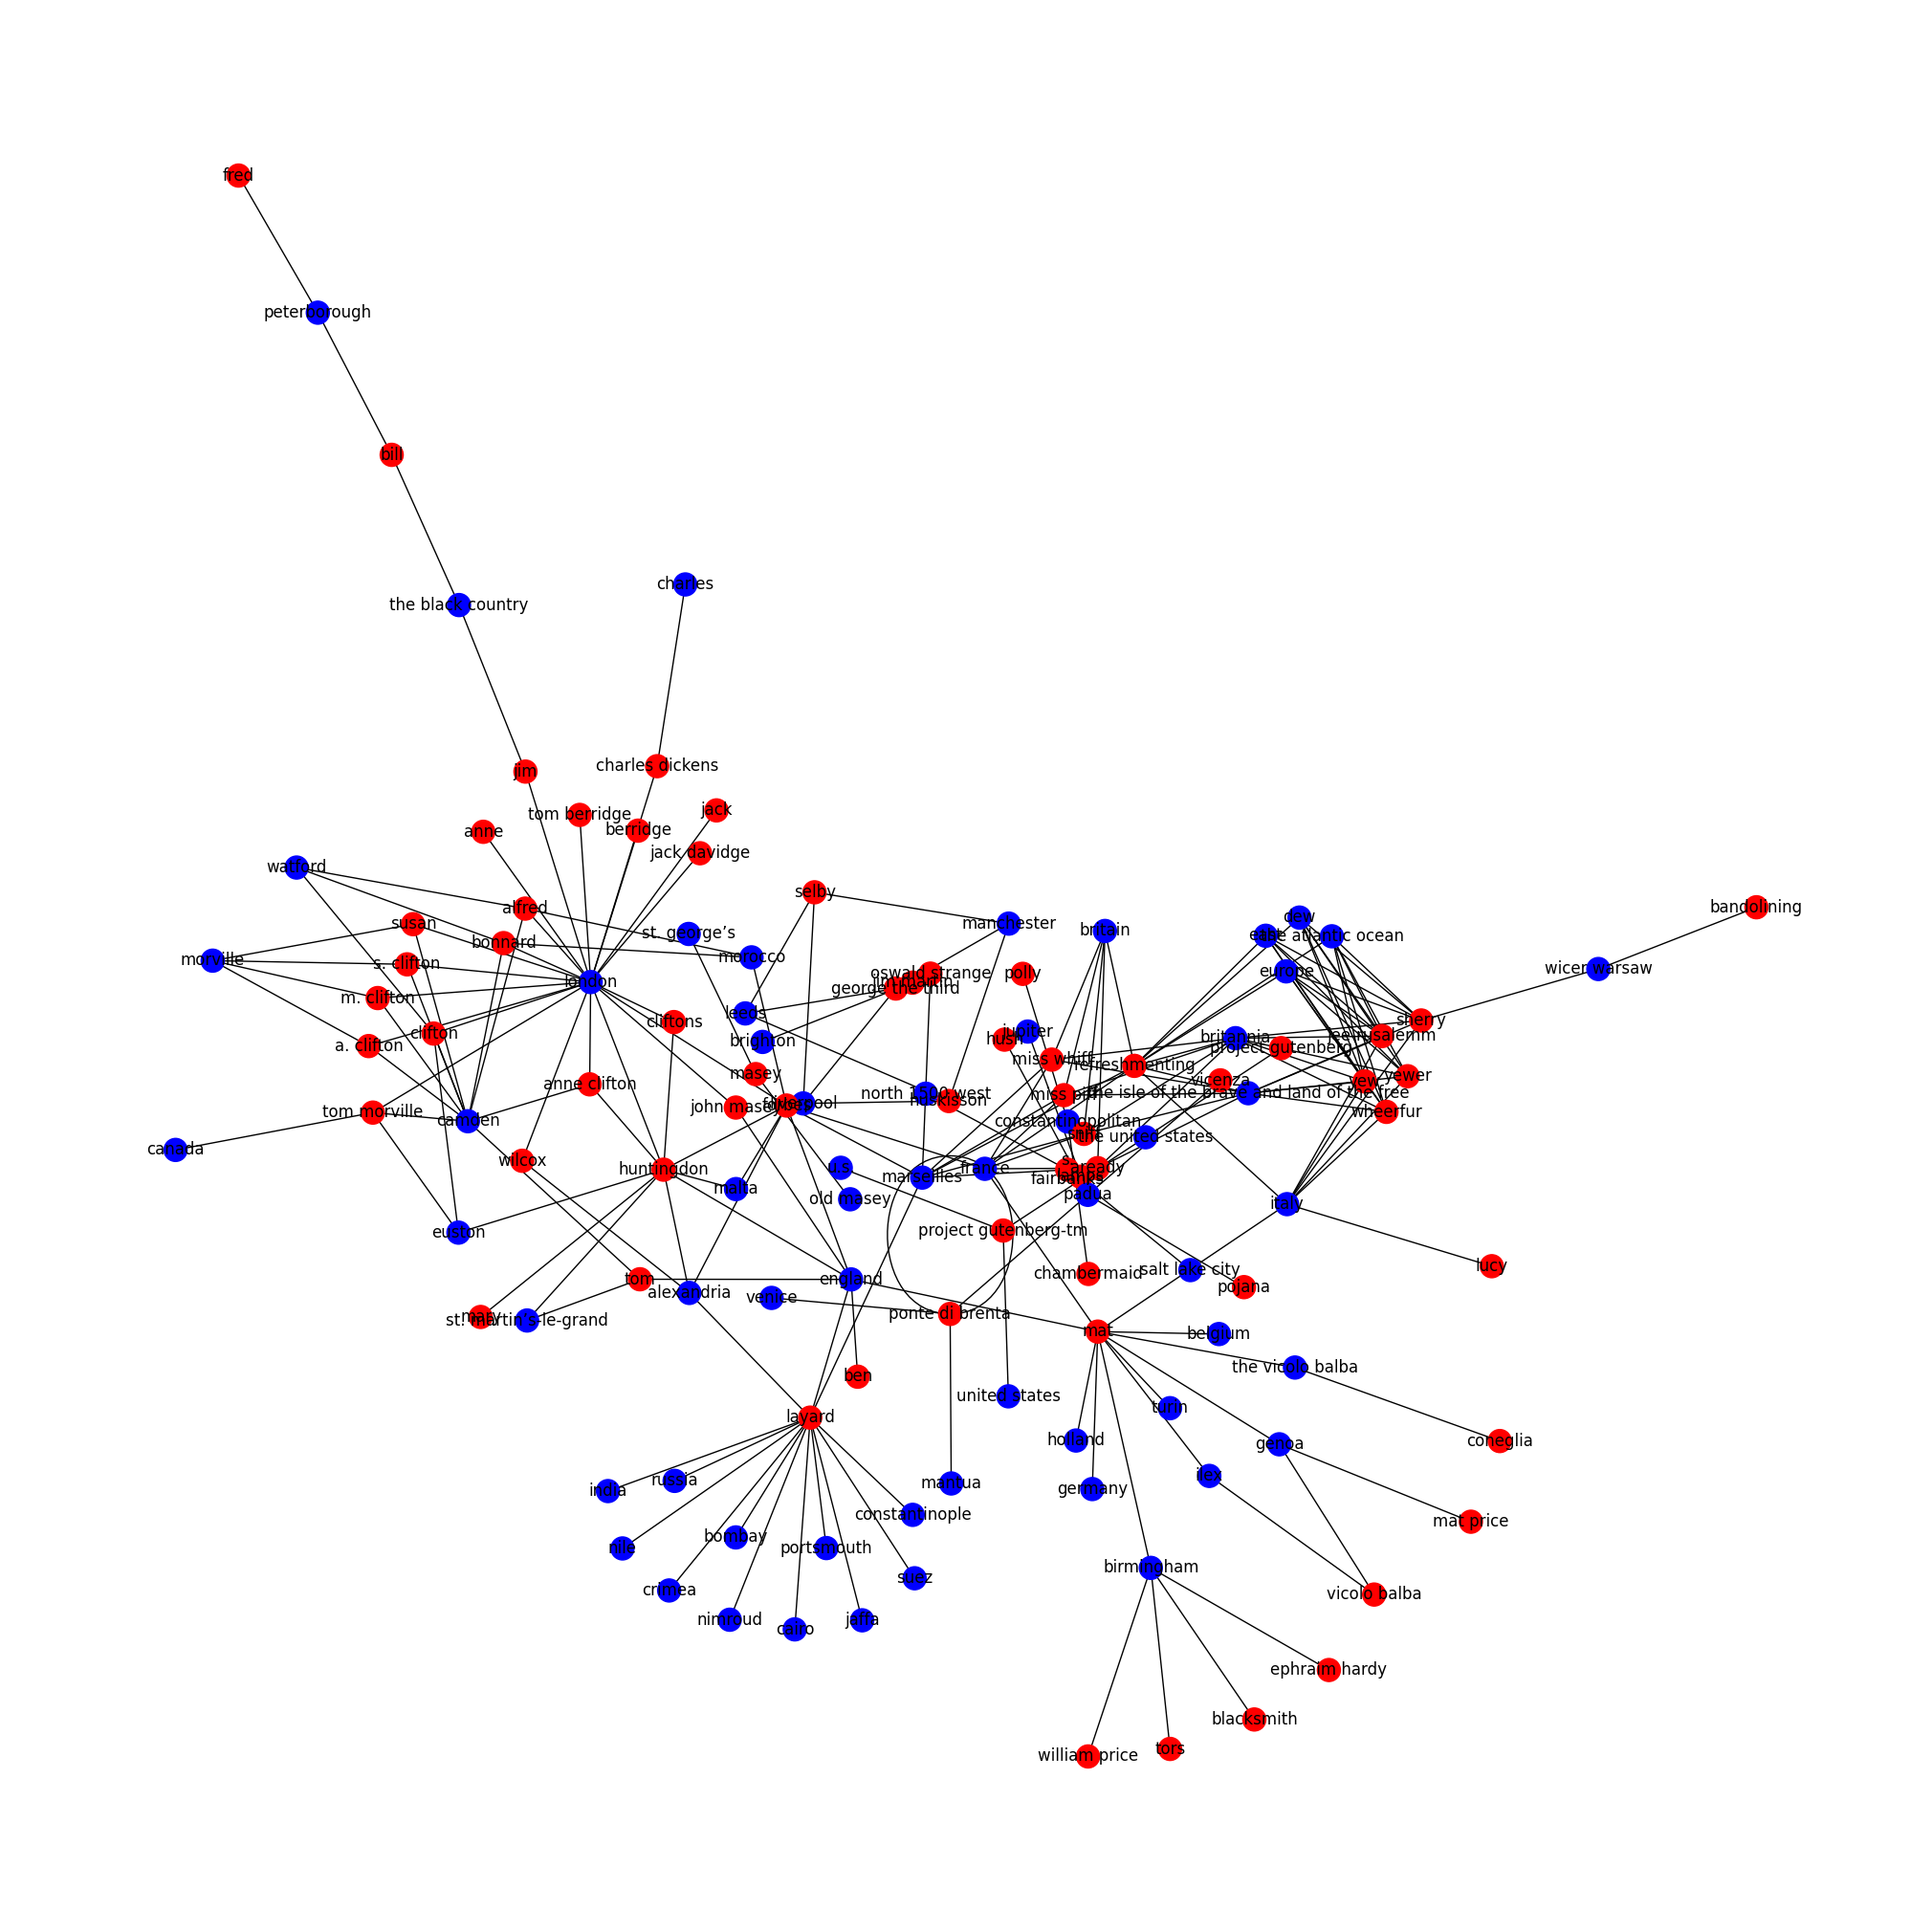

In [ ]:
visualiuzation(g_book1,edges_book1)

Book 2

In [ ]:
book2_path = "/content/datasets/dickens/564-0.txt"
entities_dict_2 = get_book_entities(book2_path, 20)
entities_dict_2

{'ORG': {'the project gutenberg license': 2,
  'edwin drood': 5,
  'ye’ll': 2,
  'dreffle': 2,
  'verger': 6,
  'drood': 8,
  'begone': 2,
  'nuns': 31,
  'house': 21,
  'hark': 2,
  'durdles': 108,
  'un': 4,
  'time': 2,
  'stony': 2,
  'widdy': 5,
  'im': 5,
  'widdy widdy': 2,
  'widdy widdy wake': 2,
  'the travellers’ twopenny': 3,
  'travellers': 2,
  'monastery': 2,
  'philanthropy': 2,
  'minor canon corner': 2,
  'helena': 21,
  'church': 4,
  'state': 4,
  'society': 2,
  'crisparkle': 3,
  'neville': 28,
  'landless': 4,
  'home': 2,
  'staple inn': 2,
  'fidelity': 3,
  'the tilted wagon': 3,
  'umps': 2,
  'navy': 2,
  'crozier': 3,
  'jarsper': 3,
  'worshipful': 2,
  'staple': 4,
  'unlimited': 2,
  'billickin': 5,
  'lobley': 2,
  'club': 5,
  'the eight club': 5,
  'kimber': 2,
  'foundation': 10,
  '1.e.8': 3,
  'the project gutenberg literary archive foundation': 11,
  'project gutenberg': 2},
 'WORK_OF_ART': {'nature': 5,
  'the noble art': 2,
  'the minor canon': 

In [ ]:
edges_book2 = get_edges(book2_path)
edges_book2

100%|██████████| 2625/2625 [00:42<00:00, 62.04it/s]


[('jack chinaman', 'chinamen'),
 ('jasper', 'tope'),
 ('edwin drood', 'east'),
 ('pussy', 'east'),
 ('impudence', 'east'),
 ('jack', 'east'),
 ('cloisterham', 'cloisterham'),
 ('cloisterham', 'cloisterham city'),
 ('eddy', 'egypt'),
 ('miss twinkleton', 'isises'),
 ('belzoni', 'isises'),
 ('thomas sapsea', 'this city'),
 ('jasper', 'tombatism'),
 ('durdles', 'tombatism'),
 ('sapsea', 'tombatism'),
 ('sapsea', 'durdles'),
 ('john jasper', 'stony durdles'),
 ('john jasper', 'durdles'),
 ('chanticleer', 'jasper'),
 ('cloisterham', 'the cathedral bell'),
 ('swaggering', 'the cathedral bell'),
 ('crisparkle', 'dresden'),
 ('honeythunder', 'london city'),
 ('crisparkle', 'china'),
 ('honeythunder', 'dresden'),
 ('crisparkle', 'london city'),
 ('honeythunder', 'china'),
 ('neville', 'helena'),
 ('septimus', 'helena'),
 ('honeythunder', 'the united kingdom'),
 ('honeythunder', 'china'),
 ('helena landless', 'china'),
 ('helena landless', 'the united kingdom'),
 ('edwin drood', 'china'),
 ('mis

In [ ]:
g_book2 = get_graph(edges_book2)
print(g_book2)

Graph with 115 nodes and 203 edges


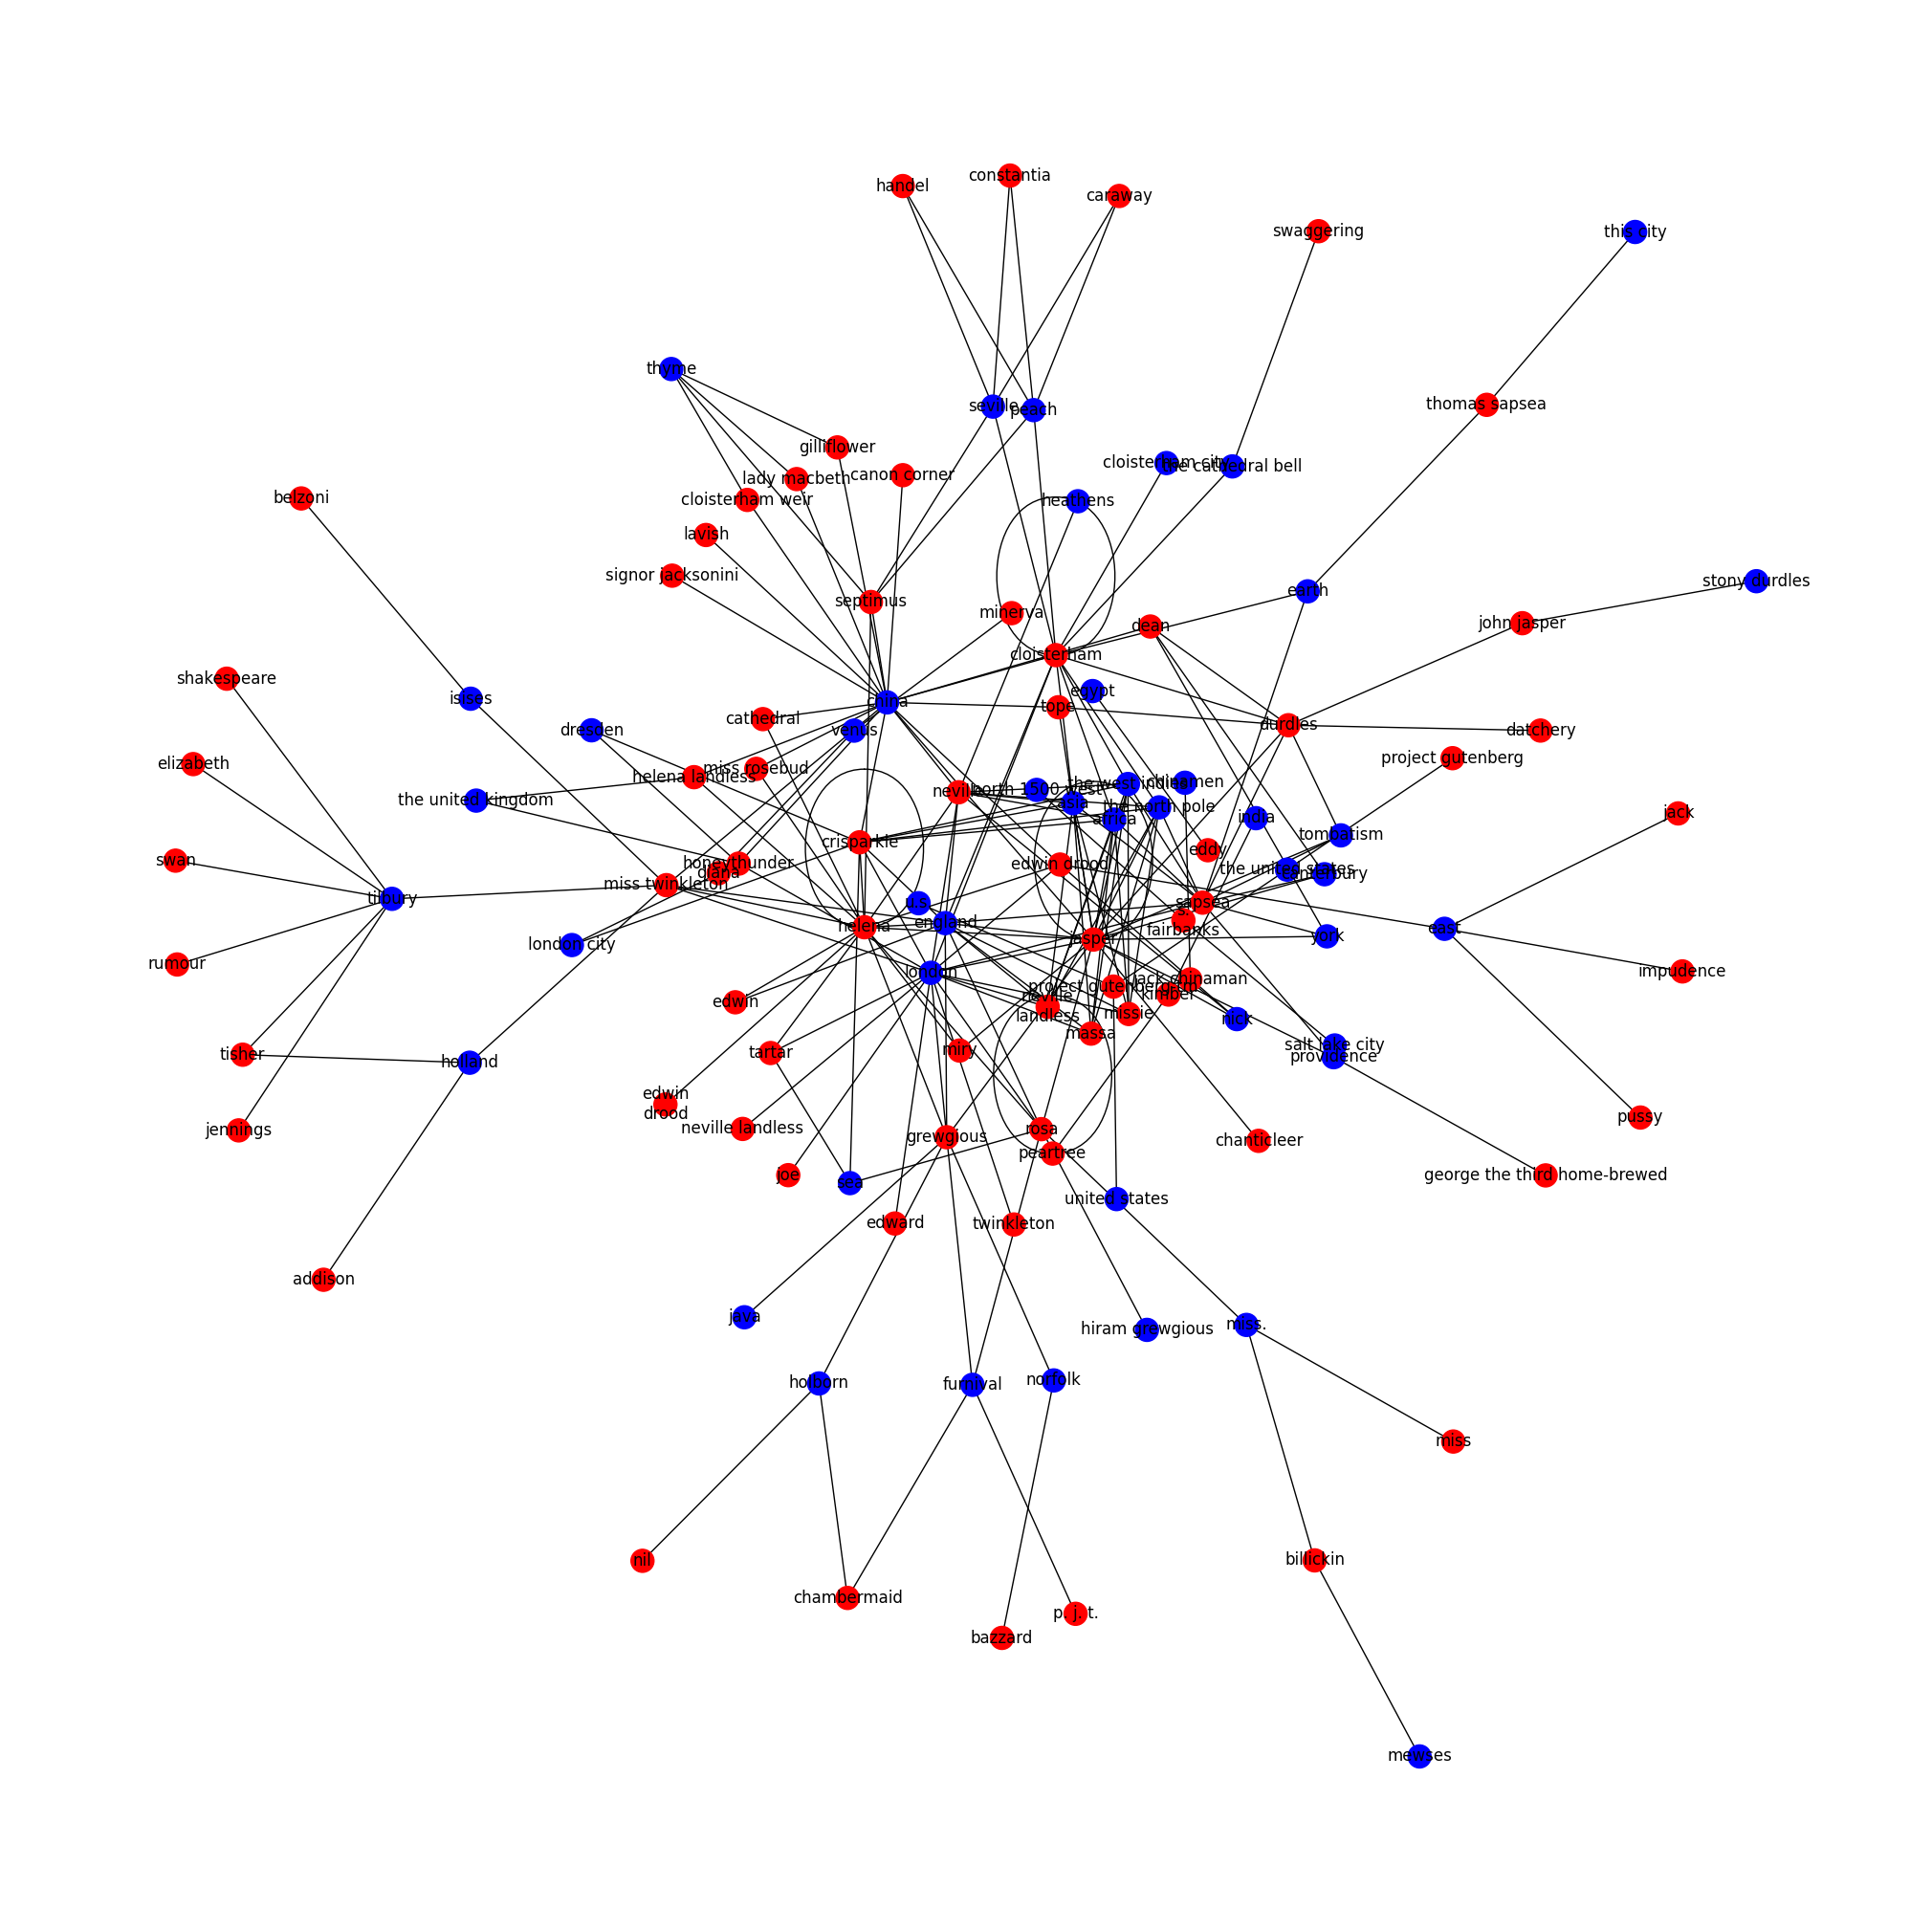

In [ ]:
visualiuzation(g_book2,edges_book2)

Book 3

In [ ]:
book3_path = "/content/datasets/dickens/564-0.txt"
entities_dict_3 = get_book_entities(book3_path, 20)
entities_dict_3

{'ORG': {'the project gutenberg license': 2,
  'edwin drood': 5,
  'ye’ll': 2,
  'dreffle': 2,
  'verger': 6,
  'drood': 8,
  'begone': 2,
  'nuns': 31,
  'house': 21,
  'hark': 2,
  'durdles': 108,
  'un': 4,
  'time': 2,
  'stony': 2,
  'widdy': 5,
  'im': 5,
  'widdy widdy': 2,
  'widdy widdy wake': 2,
  'the travellers’ twopenny': 3,
  'travellers': 2,
  'monastery': 2,
  'philanthropy': 2,
  'minor canon corner': 2,
  'helena': 21,
  'church': 4,
  'state': 4,
  'society': 2,
  'crisparkle': 3,
  'neville': 28,
  'landless': 4,
  'home': 2,
  'staple inn': 2,
  'fidelity': 3,
  'the tilted wagon': 3,
  'umps': 2,
  'navy': 2,
  'crozier': 3,
  'jarsper': 3,
  'worshipful': 2,
  'staple': 4,
  'unlimited': 2,
  'billickin': 5,
  'lobley': 2,
  'club': 5,
  'the eight club': 5,
  'kimber': 2,
  'foundation': 10,
  '1.e.8': 3,
  'the project gutenberg literary archive foundation': 11,
  'project gutenberg': 2},
 'WORK_OF_ART': {'nature': 5,
  'the noble art': 2,
  'the minor canon': 

In [ ]:
edges_book3 = get_edges(book3_path)
edges_book3

100%|██████████| 2625/2625 [00:38<00:00, 67.89it/s]


[('jack chinaman', 'chinamen'),
 ('jasper', 'tope'),
 ('edwin drood', 'east'),
 ('pussy', 'east'),
 ('impudence', 'east'),
 ('jack', 'east'),
 ('cloisterham', 'cloisterham'),
 ('cloisterham', 'cloisterham city'),
 ('eddy', 'egypt'),
 ('miss twinkleton', 'isises'),
 ('belzoni', 'isises'),
 ('thomas sapsea', 'this city'),
 ('jasper', 'tombatism'),
 ('durdles', 'tombatism'),
 ('sapsea', 'tombatism'),
 ('sapsea', 'durdles'),
 ('john jasper', 'stony durdles'),
 ('john jasper', 'durdles'),
 ('chanticleer', 'jasper'),
 ('cloisterham', 'the cathedral bell'),
 ('swaggering', 'the cathedral bell'),
 ('crisparkle', 'dresden'),
 ('honeythunder', 'london city'),
 ('crisparkle', 'china'),
 ('honeythunder', 'dresden'),
 ('crisparkle', 'london city'),
 ('honeythunder', 'china'),
 ('neville', 'helena'),
 ('septimus', 'helena'),
 ('honeythunder', 'the united kingdom'),
 ('honeythunder', 'china'),
 ('helena landless', 'china'),
 ('helena landless', 'the united kingdom'),
 ('edwin drood', 'china'),
 ('mis

In [ ]:
g_book3 = get_graph(edges_book3)
print(g_book3)

Graph with 115 nodes and 203 edges


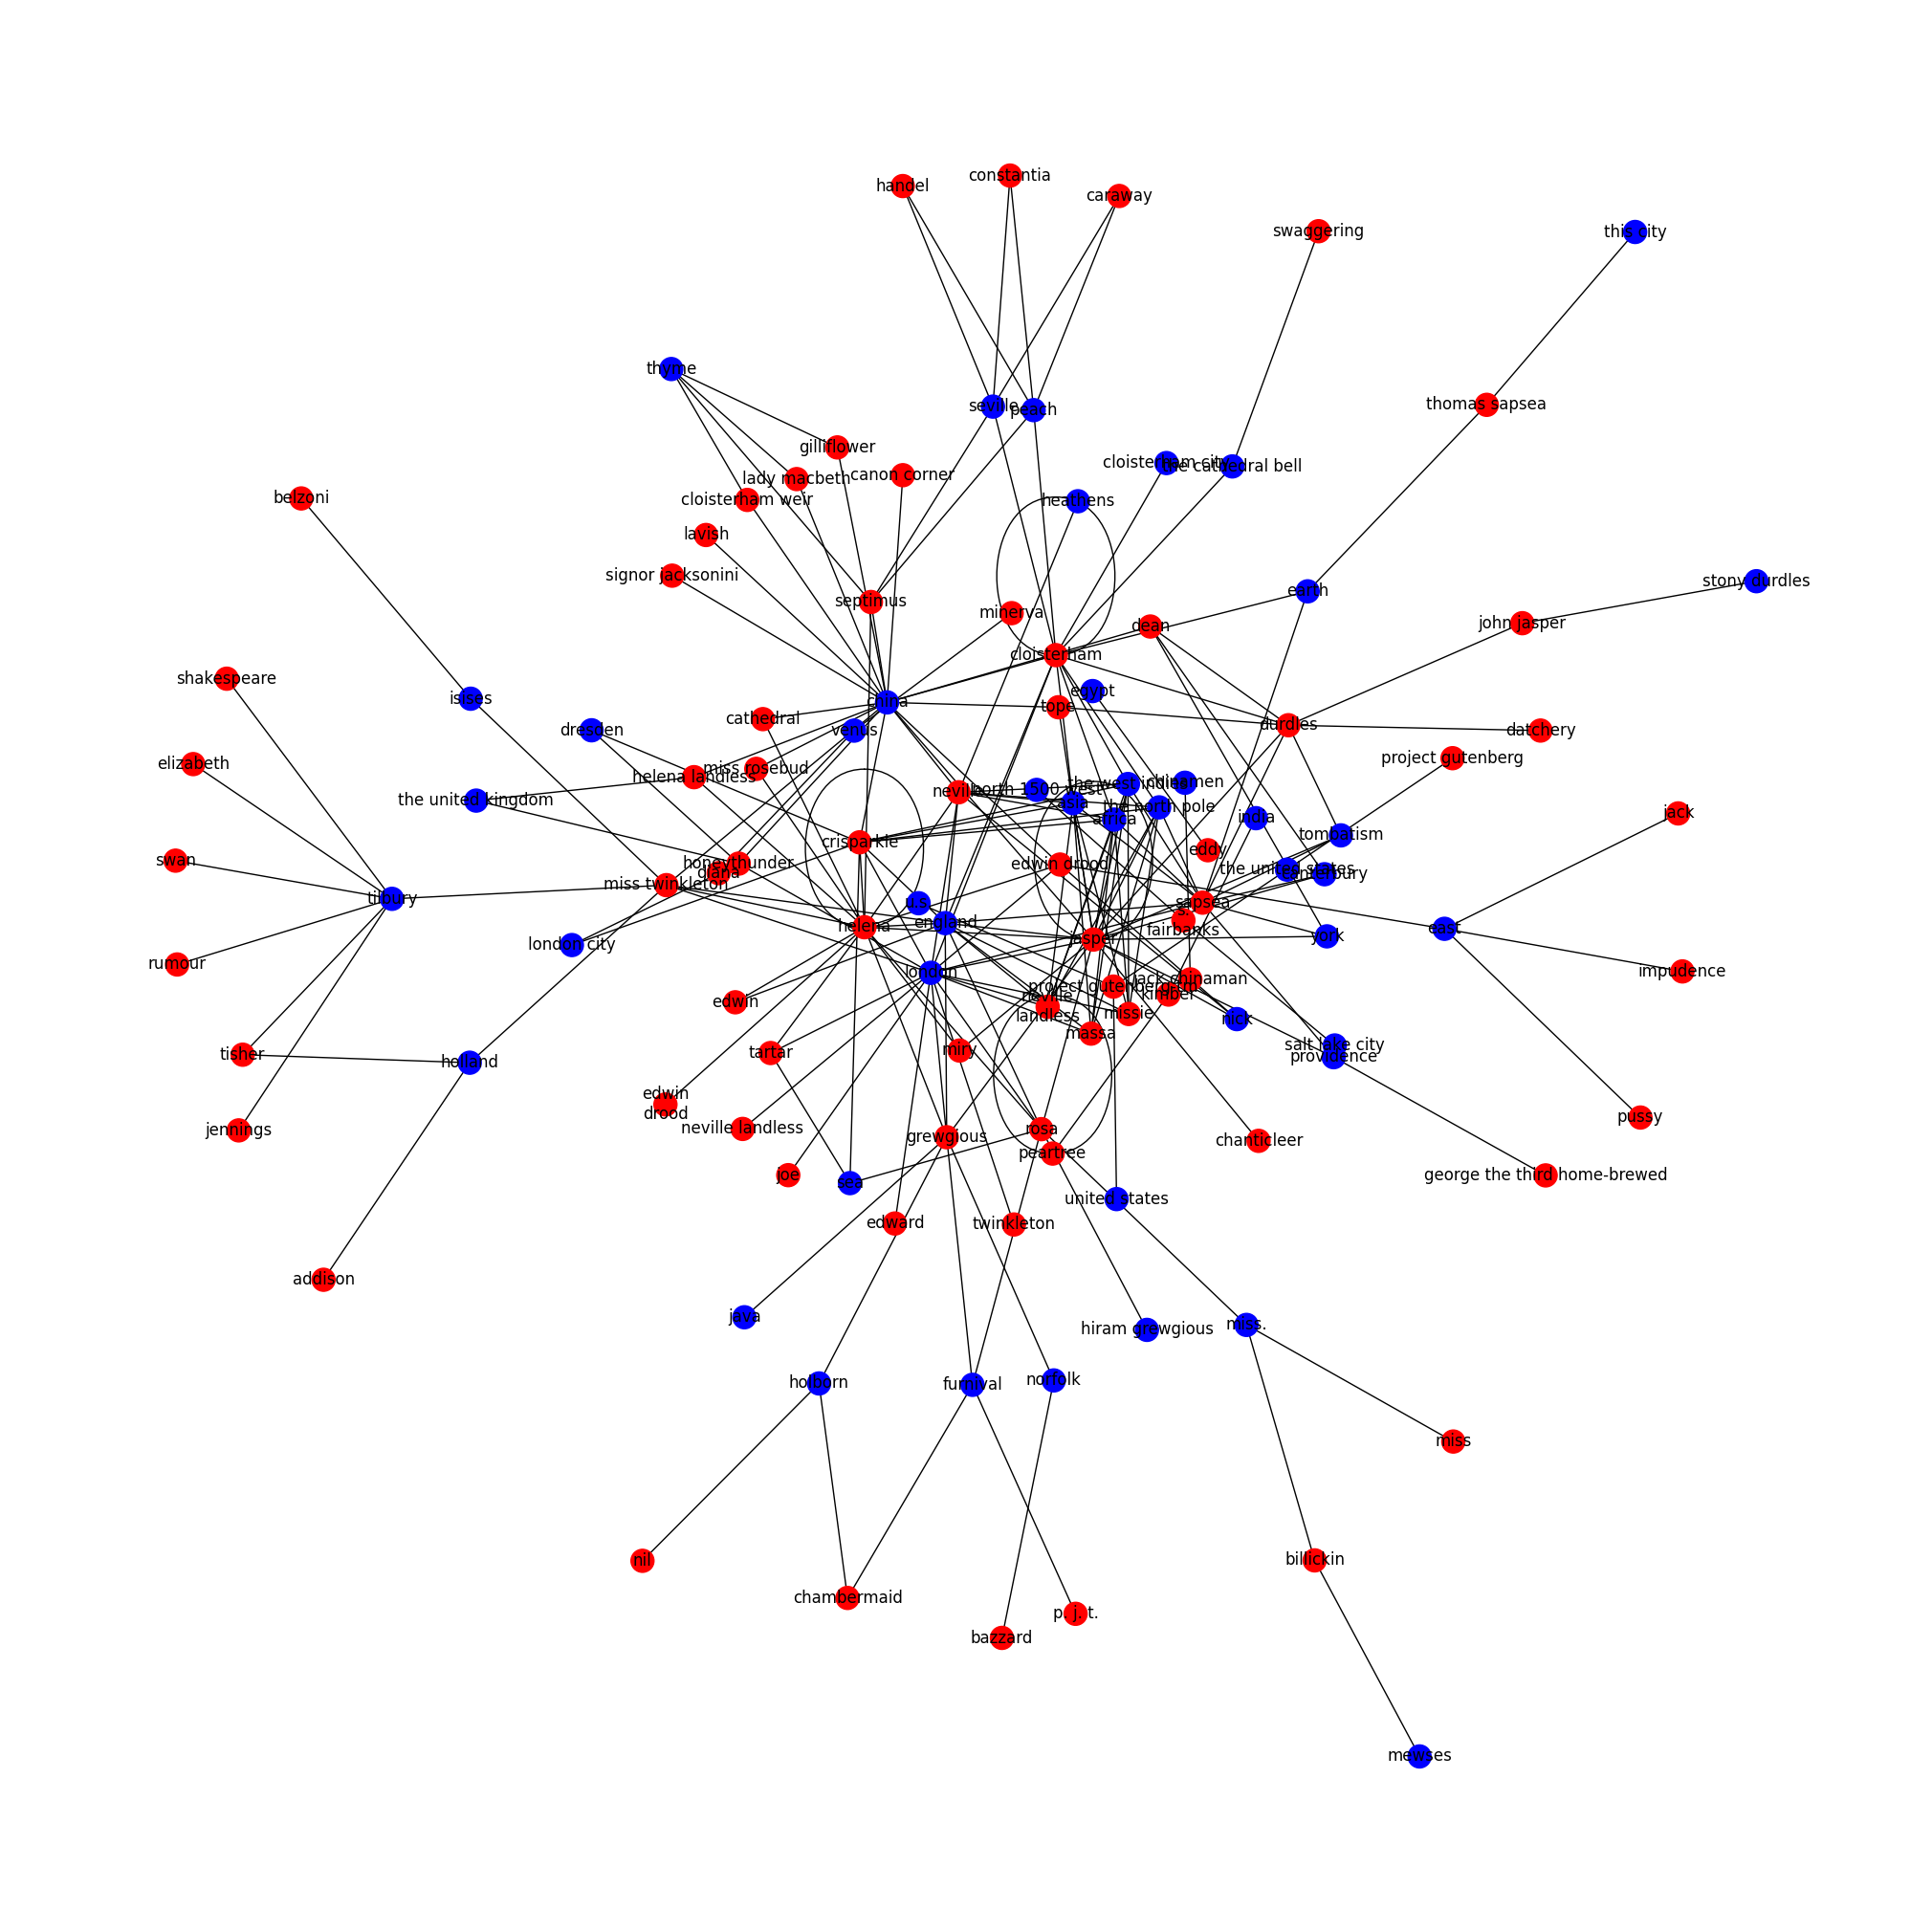

In [ ]:
visualiuzation(g_book3,edges_book3)

**Question 2:** Use the [The Big Bang Theory Transcript](https://www.kaggle.com/datasets/mitramir5/the-big-bang-theory-series-transcript)
to create and evaluate a classifier that given a line of text can predict
 who said it (20pt). Using sentiment analysis identify who are the most and less friendly character(20pt). Construct a classifier that can be given several text lines (quotes) from a specific episode that will predict the episode's season number (20pt).

In [ ]:
import kaggle
!mkdir ./datasets
!mkdir ./datasets/bbt

!kaggle datasets list -s "The Big Bang Theory Series Transcript"

mkdir: cannot create directory ‘./datasets’: File exists
ref                                              title                                  size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------  -------------------------------------  ----  -------------------  -------------  ---------  ---------------  
mitramir5/the-big-bang-theory-series-transcript  The Big Bang Theory Series Transcript   2MB  2022-02-23 11:41:49           1620         36  0.5294118        


In [ ]:
!kaggle datasets files mitramir5/the-big-bang-theory-series-transcript

name                           size  creationDate         
-----------------------------  ----  -------------------  
1_10_seasons_tbbt.csv           6MB  2022-02-23 11:41:50  
sentences_sentiment_dicts.pkl   2MB  2022-02-23 11:41:50  


In [ ]:
!kaggle datasets download mitramir5/the-big-bang-theory-series-transcript -p ./datasets/bbt
!unzip ./datasets/bbt/*.zip  -d ./datasets/bbt
!ls ./datasets/bbt

Dataset URL: https://www.kaggle.com/datasets/mitramir5/the-big-bang-theory-series-transcript
License(s): unknown
  0% 0.00/1.92M [00:00<?, ?B/s]
100% 1.92M/1.92M [00:00<00:00, 124MB/s]
Archive:  ./datasets/bbt/the-big-bang-theory-series-transcript.zip
  inflating: ./datasets/bbt/1_10_seasons_tbbt.csv  
  inflating: ./datasets/bbt/sentences_sentiment_dicts.pkl  
1_10_seasons_tbbt.csv  sentences_sentiment_dicts.pkl  the-big-bang-theory-series-transcript.zip


In [ ]:
import pandas as pd

bbt = "/content/datasets/bbt/1_10_seasons_tbbt.csv"
df = pd.read_csv(bbt)
df

,episode_name,dialogue,person_scene
0,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,Scene
1,Series 01 Episode 01 – Pilot Episode,So if a photon is directed through a plane wi...,Sheldon
2,Series 01 Episode 01 – Pilot Episode,"Agreed, what’s your point?",Leonard
3,Series 01 Episode 01 – Pilot Episode,"There’s no point, I just think it’s a good id...",Sheldon
4,Series 01 Episode 01 – Pilot Episode,Excuse me?,Leonard
...,...,...,...
54401,Series 10 Episode 24 – The Long Distance Disso...,"And I with you. Question, are you seeking a r...",Sheldon
54402,Series 10 Episode 24 – The Long Distance Disso...,What if I were?,Ramona
54403,Series 10 Episode 24 – The Long Distance Disso...,"Well, that would raise a number of problems. ...",Sheldon
54404,Series 10 Episode 24 – The Long Distance Disso...,Princeton.,Scene


In [ ]:
df['person_scene'] = df['person_scene'].str.replace(r"[()]", "", regex=True)

# Get unique values
unique_values = df['person_scene'].unique()
unique_values

array(['Scene', 'Sheldon', 'Leonard', 'Receptionist', 'Penny', 'mouths',
       'back', 'Howard', 'Raj', 'buzzer', 'Voice', 'man', 'Man', 'sings',
       'off', 'together', 'snarkily', 'entering', 'likewise', 'door',
       'talk', 'internally', 'mat', 'him', 'ear', 'Teleplay', 'Story',
       'hallway', 'Doug', 'Lesley', 'instructor', 'singing', 'Waitress',
       'Summer', 'Gablehouser', 'round', 'supplements', 'Cooper', 'chair',
       'leaving', 'quartettist', 'room', 'apartment', 'inside',
       'arriving', 'costume', 'All', 'Thor', 'off-screen', 'Girl',
       'Costume', 'Kurt', 'ground', 'doorway', 'phone', 'television',
       'again', 'Christie', 'Waiter', 'answering', 'voice', 'within',
       'women', 'Koothrappali', 'Together', 'gather', 'Lalita',
       'embarrassed', 'mailbox', 'glasses', 'down', 'floor', 'captions',
       'two', 'one', 'tunelessly', 'Toby', 'duvet', 'stairs', 'Mother',
       'clearance', 'sigh', 'teeth', 'vaporub', 'Dennis', 'dramatically',
       'tu

In [ ]:
import spacy
from tqdm import tqdm
nlp = spacy.load('en_core_web_lg')
df = df[df['dialogue'].apply(lambda x: isinstance(x, str))]

vectors = []
for s in tqdm(df['dialogue'], desc="Processing dialogues"):
    vectors.append(nlp(s).vector)

cols = [f"Feature {i}" for i in range(len(vectors[0]))]
v_df = pd.DataFrame(data = vectors, columns=cols)
v_df['person_scene'] = df['person_scene']
v_df['vectors'] = vectors
v_df = v_df.dropna()
v_df

Processing dialogues: 100%|██████████| 54404/54404 [08:10<00:00, 110.85it/s]


,Feature 0,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,...,Feature 292,Feature 293,Feature 294,Feature 295,Feature 296,Feature 297,Feature 298,Feature 299,person_scene,vectors
0,-2.356294,-0.040850,-3.007274,-0.581576,6.057200,-1.197322,0.244816,3.182531,2.633566,2.912950,...,1.987517,0.960006,-0.776691,3.720919,-0.560719,-0.414905,-1.360217,-0.000241,Scene,"[-2.3562944, -0.040849924, -3.0072737, -0.5815..."
1,-0.450639,3.104287,-2.828922,-0.353636,3.644886,1.763479,0.354460,4.786934,-0.931640,-0.499153,...,1.095699,-0.728606,-1.840604,1.899711,1.566878,0.061389,-2.317459,1.641430,Sheldon,"[-0.45063883, 3.1042867, -2.8289223, -0.353636..."
2,0.210074,2.935787,-3.431794,-1.301276,3.291670,0.824903,0.438865,3.046212,-1.852689,0.287488,...,1.640337,-2.423426,-1.750413,-1.132814,-1.453994,1.141116,-0.636916,0.204747,Leonard,"[0.21007374, 2.9357874, -3.4317942, -1.3012763..."
3,-0.882029,3.372322,-2.274610,-0.622226,3.297449,0.768119,1.065437,5.086370,-1.848411,-0.138220,...,0.911469,-1.313740,-1.666695,1.515167,0.415011,2.425927,-2.621919,1.085537,Sheldon,"[-0.8820287, 3.372322, -2.27461, -0.622226, 3...."
4,0.462950,2.831075,-3.821650,-0.115880,-3.603967,-0.602332,-0.298879,-1.520012,-2.563367,3.986250,...,3.359950,-4.314800,-1.041438,-3.447550,0.005520,4.444200,-1.837225,-0.245040,Leonard,"[0.46294993, 2.831075, -3.82165, -0.11588, -3...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54399,-1.925077,0.700921,-3.497705,-0.409389,0.445187,0.112170,-0.747860,3.241542,-2.274435,2.289976,...,1.217606,-2.795911,-1.652923,-0.378925,0.740953,1.240722,-3.616941,0.961473,Sheldon,"[-1.9250768, 0.7009212, -3.4977055, -0.4093893..."
54400,-4.072050,1.118673,-3.557107,-1.980068,-3.204612,1.124292,-0.879547,3.304667,-3.560050,4.270803,...,5.391317,-1.790300,-2.314867,-2.679532,-0.733483,3.370631,-1.971183,1.502988,Ramona,"[-4.07205, 1.1186733, -3.5571067, -1.9800682, ..."
54401,-1.253994,0.563687,-3.267846,-0.831917,2.275509,1.209924,-0.236624,3.938339,-0.822824,1.587885,...,0.212792,-1.294093,-1.699876,0.786535,1.416260,0.973204,-3.014001,1.587842,Sheldon,"[-1.2539942, 0.56368744, -3.2678456, -0.831916..."
54402,-0.795718,-1.728573,-0.768100,-1.169966,4.875867,1.365207,0.260223,1.231130,0.206597,-0.619693,...,0.766643,-1.525670,-0.008267,1.185033,-0.697533,0.617687,-0.533697,-1.419367,Ramona,"[-0.79571795, -1.7285733, -0.76809996, -1.1699..."


In [ ]:
from catboost import CatBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

train, test = train_test_split(v_df, test_size=0.2)
X_train = train.drop(["person_scene", "vectors"], axis=1)
X_test = test.drop(["person_scene", "vectors"], axis=1)
Y_train = train["person_scene"].values
Y_test = test["person_scene"].values


# Initialize the classifier
model = RandomForestClassifier(max_depth=5,n_estimators=100, random_state=42, n_jobs=-1)

# Train the model
model.fit(X_train, Y_train)

# Predict
y_predict = model.predict(X_test)
print(accuracy_score(Y_test,y_predict))

0.2130318904512453


In [ ]:
def predict_speaker(sentence, nlp_model, catboost_model):
    # Vectorize the input sentence
    sentence_vector = nlp_model(sentence).vector.reshape(1, -1)

    # Predict using the trained model
    prediction = catboost_model.predict(sentence_vector)
    return prediction[0]

# Example Usage
test_sentence = "Shut up Sheldon."
predicted_speaker = predict_speaker(test_sentence, nlp, model)
print(f"The predicted speaker is: {predicted_speaker}")

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


The predicted speaker is: Sheldon


predicting friendliest with sentiment analysis

In [ ]:
from textblob import TextBlob
import pandas as pd

def get_sentiment(dialogue):
    return TextBlob(dialogue).sentiment.polarity

df['sentiment'] = df['dialogue'].apply(get_sentiment)

character_sentiments = df.groupby('person_scene')['sentiment'].mean().reset_index()
character_sentiments = character_sentiments.sort_values('sentiment', ascending=False)

most_friendly = character_sentiments.iloc[0]
least_friendly = character_sentiments.iloc[-1]

print("Most Friendly Character:")
print(most_friendly)

print("\nLeast Friendly Character:")
print(least_friendly)

Most Friendly Character:
person_scene    seat
sentiment        1.0
Name: 474, dtype: object

Least Friendly Character:
person_scene    simultaneously
sentiment                 -0.8
Name: 485, dtype: object


<ipython-input-6-200b8243a0d4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['dialogue'].apply(get_sentiment)


Classifier that can be given several text lines (quotes) from a specific episode that will predict the episode's season number


In [ ]:
v_df['season'] = df['episode_name'].str.extract(r'Series (\d+)').astype(int)
v_df

,Feature 0,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,...,Feature 293,Feature 294,Feature 295,Feature 296,Feature 297,Feature 298,Feature 299,person_scene,vectors,season
0,-2.356294,-0.040850,-3.007274,-0.581576,6.057200,-1.197322,0.244816,3.182531,2.633566,2.912950,...,0.960006,-0.776691,3.720919,-0.560719,-0.414905,-1.360217,-0.000241,Scene,"[-2.3562944, -0.040849924, -3.0072737, -0.5815...",1
1,-0.450639,3.104287,-2.828922,-0.353636,3.644886,1.763479,0.354460,4.786934,-0.931640,-0.499153,...,-0.728606,-1.840604,1.899711,1.566878,0.061389,-2.317459,1.641430,Sheldon,"[-0.45063883, 3.1042867, -2.8289223, -0.353636...",1
2,0.210074,2.935787,-3.431794,-1.301276,3.291670,0.824903,0.438865,3.046212,-1.852689,0.287488,...,-2.423426,-1.750413,-1.132814,-1.453994,1.141116,-0.636916,0.204747,Leonard,"[0.21007374, 2.9357874, -3.4317942, -1.3012763...",1
3,-0.882029,3.372322,-2.274610,-0.622226,3.297449,0.768119,1.065437,5.086370,-1.848411,-0.138220,...,-1.313740,-1.666695,1.515167,0.415011,2.425927,-2.621919,1.085537,Sheldon,"[-0.8820287, 3.372322, -2.27461, -0.622226, 3....",1
4,0.462950,2.831075,-3.821650,-0.115880,-3.603967,-0.602332,-0.298879,-1.520012,-2.563367,3.986250,...,-4.314800,-1.041438,-3.447550,0.005520,4.444200,-1.837225,-0.245040,Leonard,"[0.46294993, 2.831075, -3.82165, -0.11588, -3....",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54399,-1.925077,0.700921,-3.497705,-0.409389,0.445187,0.112170,-0.747860,3.241542,-2.274435,2.289976,...,-2.795911,-1.652923,-0.378925,0.740953,1.240722,-3.616941,0.961473,Sheldon,"[-1.9250768, 0.7009212, -3.4977055, -0.4093893...",10
54400,-4.072050,1.118673,-3.557107,-1.980068,-3.204612,1.124292,-0.879547,3.304667,-3.560050,4.270803,...,-1.790300,-2.314867,-2.679532,-0.733483,3.370631,-1.971183,1.502988,Ramona,"[-4.07205, 1.1186733, -3.5571067, -1.9800682, ...",10
54401,-1.253994,0.563687,-3.267846,-0.831917,2.275509,1.209924,-0.236624,3.938339,-0.822824,1.587885,...,-1.294093,-1.699876,0.786535,1.416260,0.973204,-3.014001,1.587842,Sheldon,"[-1.2539942, 0.56368744, -3.2678456, -0.831916...",10
54402,-0.795718,-1.728573,-0.768100,-1.169966,4.875867,1.365207,0.260223,1.231130,0.206597,-0.619693,...,-1.525670,-0.008267,1.185033,-0.697533,0.617687,-0.533697,-1.419367,Ramona,"[-0.79571795, -1.7285733, -0.76809996, -1.1699...",10


In [ ]:
train, test = train_test_split(v_df, test_size=0.2)
X_train = train.drop(["person_scene", "vectors","season"], axis=1)
X_test = test.drop(["person_scene", "vectors","season"], axis=1)
Y_train = train["season"].values
Y_test = test["season"].values


# Initialize the classifier
model = RandomForestClassifier(max_depth=5,n_estimators=100, random_state=42, n_jobs=-1)

# Train the model
model.fit(X_train, Y_train)

# Predict
y_predict = model.predict(X_test)
print(accuracy_score(Y_test,y_predict))

0.13491407039794137


In [ ]:
def predict_season(quotes, nlp_model, ml_model):
    # Combine multiple quotes into a single text
    combined_text = ' '.join(quotes)

    # Vectorize the combined text using SpaCy
    combined_vector = nlp_model(combined_text).vector.reshape(1, -1)

    # Predict the season using the trained model
    prediction = ml_model.predict(combined_vector)
    return prediction[0]

test_quotes = ["Hello world!", "This is the first episode."]
predicted_season = predict_season(test_quotes, nlp, model)
print(f"Predicted Season: {predicted_season}")

Predicted Season: 4


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


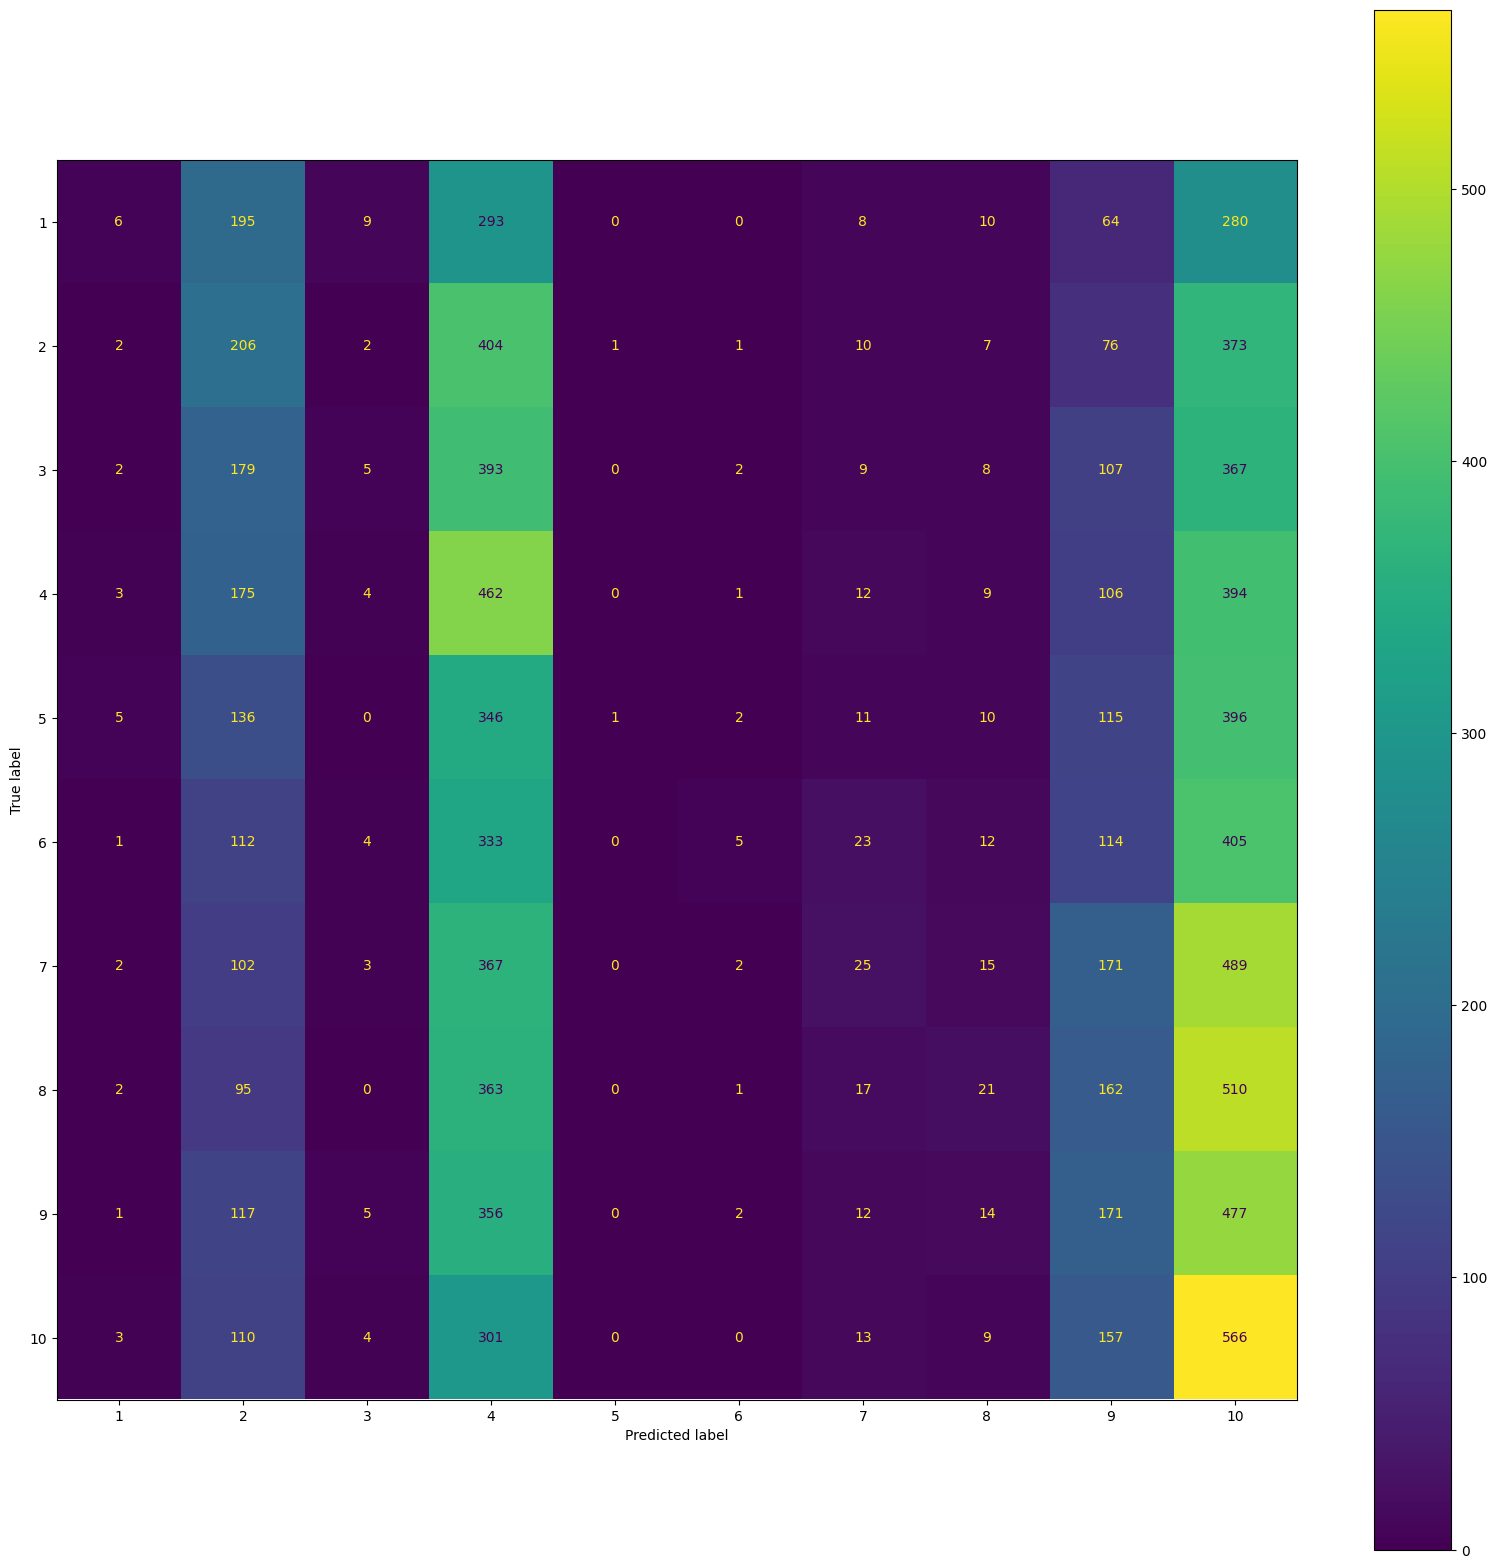

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(Y_test, y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
fig, ax = plt.subplots(figsize=(20,20))
disp.plot(ax=ax)

**Question 3 (Bonus)**: Continue Example 7 in the lecture's notebook by using the headline categroy prediction to improve the fake news classifier (10pt).

In [ ]:
!mkdir ./datasets
!mkdir ./datasets/news

# download the dataset from Kaggle and unzip it
!kaggle datasets download rmisra/news-category-dataset -p ./datasets/news
!unzip ./datasets/news/*.zip  -d ./datasets/news/

mkdir: cannot create directory ‘./datasets’: File exists
Dataset URL: https://www.kaggle.com/datasets/rmisra/news-category-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
 38% 10.0M/26.5M [00:00<00:00, 47.1MB/s]
100% 26.5M/26.5M [00:00<00:00, 94.9MB/s]
Archive:  ./datasets/news/news-category-dataset.zip
  inflating: ./datasets/news/News_Category_Dataset_v3.json  


In [ ]:
!pip install vaex

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 86.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 77.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 100.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 367.3/367.3 kB 30.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.3/516.3 kB 42.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.1/442.1 kB 39.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 73.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 85.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━

In [ ]:
import pandas as pd
import vaex

dataset_path = "./datasets/news/News_Category_Dataset_v3.json"
df = pd.read_json(dataset_path, lines=True)
v_df = vaex.from_pandas(df)
v_df

#,link,headline,category,short_description,authors,date
0,'https://www.huffpost.com/entry/covid-boosters-u...,'Over 4 Million Americans Roll Up Sleeves For Om...,U.S. NEWS,'Health experts said it is too early to predict ...,"Carla K. Johnson, AP",2022-09-23 00:00:00.000000000
1,'https://www.huffpost.com/entry/american-airline...,"'American Airlines Flyer Charged, Banned For Lif...",U.S. NEWS,'He was subdued by passengers and crew when he f...,Mary Papenfuss,2022-09-23 00:00:00.000000000
2,'https://www.huffpost.com/entry/funniest-tweets-...,'23 Of The Funniest Tweets About Cats And Dogs T...,COMEDY,"'""Until you have a dog you don\'t understand what...",Elyse Wanshel,2022-09-23 00:00:00.000000000
3,'https://www.huffpost.com/entry/funniest-parenti...,'The Funniest Tweets From Parents This Week (Sep...,PARENTING,"'""Accidentally put grown-up toothpaste on my tod...",Caroline Bologna,2022-09-23 00:00:00.000000000
4,'https://www.huffpost.com/entry/amy-cooper-loses...,'Woman Who Called Cops On Black Bird-Watcher Los...,U.S. NEWS,'Amy Cooper accused investment firm Franklin Tem...,Nina Golgowski,2022-09-22 00:00:00.000000000
...,...,...,...,...,...,...
"209,522",'https://www.huffingtonpost.com/entry/rim-ceo-th...,"""RIM CEO Thorsten Heins' 'Significant' Plans For...",TECH,'Verizon Wireless and AT&T are already promoting...,"Reuters, Reuters",2012-01-28 00:00:00.000000000
"209,523",'https://www.huffingtonpost.com/entry/maria-shar...,'Maria Sharapova Stunned By Victoria Azarenka In...,SPORTS,"'Afterward, Azarenka, more effusive with the pre...",,2012-01-28 00:00:00.000000000
"209,524",'https://www.huffingtonpost.com/entry/super-bowl...,"'Giants Over Patriots, Jets Over Colts Among Mo...",SPORTS,"'Leading up to Super Bowl XLVI, the most talked ...",,2012-01-28 00:00:00.000000000
"209,525",'https://www.huffingtonpost.com/entry/aldon-smit...,'Aldon Smith Arrested: 49ers Linebacker Busted F...,SPORTS,'CORRECTION: An earlier version of this story in...,,2012-01-28 00:00:00.000000000


In [ ]:
!pip install nltk

In [ ]:
import numpy as np
from nltk import word_tokenize
import nltk
import spacy
from tqdm import tqdm
nltk.download('punkt_tab')

nlp = spacy.load('en_core_web_lg')


def txt2vector(txt):
    txt = txt.lower()
    words = word_tokenize(txt)
    words = [w for w in words if w in model]
    if len(words) != 0:
        return np.mean([model[w] for w in words], axis=0)
    return None
head_line_vectors = []
vectors = []
df = v_df.to_pandas_df()
for txt in tqdm(df['headline'].values):
    head_line_vectors.append(txt2vector(txt))
    vectors.append(nlp(txt).vector)
df['headline_vector'] = head_line_vectors
df['vector'] = vectors

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
100%|██████████| 209527/209527 [29:57<00:00, 116.57it/s]


In [ ]:
col_names = [f"Feature {i}" for i in range(len(vectors[0]))]
df2 = pd.DataFrame(vectors, columns=col_names)
df2['category'] = df['category']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from catboost import CatBoostClassifier



train, test = train_test_split(df2, test_size=0.2)
X_train, X_test = train.drop('category', axis=1), test.drop('category', axis=1)
y_train, y_test = train['category'], test['category']
clf = CatBoostClassifier(iterations=100,
                          learning_rate=0.1,
                          depth=3)

clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
print(accuracy_score(y_test,y_predict))

0:	learn: 3.4918841	total: 8.46s	remaining: 13m 58s
1:	learn: 3.3903132	total: 14.7s	remaining: 12m 1s
2:	learn: 3.3189749	total: 22.5s	remaining: 12m 6s
3:	learn: 3.2652052	total: 29.1s	remaining: 11m 38s
4:	learn: 3.2182550	total: 35.8s	remaining: 11m 20s
5:	learn: 3.1739636	total: 42.4s	remaining: 11m 4s
6:	learn: 3.1385410	total: 51.1s	remaining: 11m 19s
7:	learn: 3.1094945	total: 58.8s	remaining: 11m 16s
8:	learn: 3.0839579	total: 1m 5s	remaining: 11m
9:	learn: 3.0619102	total: 1m 11s	remaining: 10m 46s
10:	learn: 3.0398763	total: 1m 19s	remaining: 10m 46s
11:	learn: 3.0224417	total: 1m 25s	remaining: 10m 26s
12:	learn: 3.0056657	total: 1m 33s	remaining: 10m 28s
13:	learn: 2.9904685	total: 1m 40s	remaining: 10m 16s
14:	learn: 2.9764454	total: 1m 49s	remaining: 10m 18s
15:	learn: 2.9632987	total: 1m 54s	remaining: 10m 2s
16:	learn: 2.9494159	total: 2m 2s	remaining: 9m 57s
17:	learn: 2.9374422	total: 2m 8s	remaining: 9m 43s
18:	learn: 2.9252811	total: 2m 14s	remaining: 9m 33s
19:	le

In [ ]:
!mkdir ./datasets/fake-news

# download the dataset from Kaggle and unzip it
!kaggle datasets download jruvika/fake-news-detection -p ./datasets/fake-news
!unzip ./datasets/fake-news/*.zip  -d ./datasets/fake-news/

Dataset URL: https://www.kaggle.com/datasets/jruvika/fake-news-detection
License(s): ODbL-1.0
  0% 0.00/4.89M [00:00<?, ?B/s]
100% 4.89M/4.89M [00:00<00:00, 130MB/s]
Archive:  ./datasets/fake-news/fake-news-detection.zip
  inflating: ./datasets/fake-news/data.csv  
  inflating: ./datasets/fake-news/data.h5  


In [ ]:
import pandas as pd
%matplotlib inline
fake_news_dataset_path = "./datasets/fake-news/data.csv"
df = pd.read_csv(fake_news_dataset_path)
df['title'] = df['Headline'].apply(lambda t: str(t))

df = df[['Headline','Label']]

In [ ]:
head_line_vectors = []
vectors = []
for txt in tqdm(df['Headline']):
    head_line_vectors.append(txt2vector(txt))
    vectors.append(nlp(txt).vector)
df['headline_vector'] = vectors
df['vector'] = vectors

100%|██████████| 4009/4009 [00:34<00:00, 117.84it/s]


In [ ]:
col_names = [f"Feature {i}" for i in range(len(vectors[0]))]
df2 = pd.DataFrame(vectors, columns=col_names)

In [ ]:
clf.predict(df2)[:100]

array([['POLITICS'],
       ['POLITICS'],
       ['POLITICS'],
       ['POLITICS'],
       ['ENTERTAINMENT'],
       ['SPORTS'],
       ['POLITICS'],
       ['WELLNESS'],
       ['POLITICS'],
       ['BUSINESS'],
       ['POLITICS'],
       ['SPORTS'],
       ['FOOD & DRINK'],
       ['WELLNESS'],
       ['STYLE & BEAUTY'],
       ['POLITICS'],
       ['ENTERTAINMENT'],
       ['POLITICS'],
       ['POLITICS'],
       ['POLITICS'],
       ['POLITICS'],
       ['WELLNESS'],
       ['POLITICS'],
       ['POLITICS'],
       ['STYLE & BEAUTY'],
       ['POLITICS'],
       ['STYLE & BEAUTY'],
       ['POLITICS'],
       ['WELLNESS'],
       ['POLITICS'],
       ['WELLNESS'],
       ['POLITICS'],
       ['POLITICS'],
       ['POLITICS'],
       ['POLITICS'],
       ['POLITICS'],
       ['POLITICS'],
       ['TRAVEL'],
       ['STYLE & BEAUTY'],
       ['WORLDPOST'],
       ['WELLNESS'],
       ['SPORTS'],
       ['ENTERTAINMENT'],
       ['SPORTS'],
       ['WELLNESS'],
       ['SPORTS'],
  

In [ ]:
col = clf.predict(df2)
df['category'] = col.ravel()
df

,Headline,Label,headline_vector,vector,category
0,Four ways Bob Corker skewered Donald Trump,1,"[-0.9669399, -0.2016143, -1.7214224, 1.9221085...","[-0.9669399, -0.2016143, -1.7214224, 1.9221085...",POLITICS
1,Linklater's war veteran comedy speaks to moder...,1,"[0.22260022, 2.0126882, -1.4838835, -1.7146477...","[0.22260022, 2.0126882, -1.4838835, -1.7146477...",POLITICS
2,Trump’s Fight With Corker Jeopardizes His Legi...,1,"[0.5653834, 1.6429498, -0.909484, 0.5166134, 4...","[0.5653834, 1.6429498, -0.909484, 0.5166134, 4...",POLITICS
3,Egypt's Cheiron wins tie-up with Pemex for Mex...,1,"[-1.918378, 1.8654314, -1.2472457, 1.8484844, ...","[-1.918378, 1.8654314, -1.2472457, 1.8484844, ...",POLITICS
4,Jason Aldean opens 'SNL' with Vegas tribute,1,"[-0.3654678, 0.5542955, 2.643392, -0.6503613, ...","[-0.3654678, 0.5542955, 2.643392, -0.6503613, ...",ENTERTAINMENT
...,...,...,...,...,...
4004,Trends to Watch,0,"[1.1853666, 5.868033, -3.5912502, -1.4538101, ...","[1.1853666, 5.868033, -3.5912502, -1.4538101, ...",WELLNESS
4005,Trump Jr. Is Soon To Give A 30-Minute Speech F...,0,"[-0.9967807, -0.004599273, -3.515578, 1.562089...","[-0.9967807, -0.004599273, -3.515578, 1.562089...",POLITICS
4006,"Ron Paul on Trump, Anarchism & the AltRight",0,"[-3.1454222, -2.3718011, -1.5306933, 1.5953223...","[-3.1454222, -2.3718011, -1.5306933, 1.5953223...",POLITICS
4007,China to accept overseas trial data in bid to ...,1,"[0.5698384, 3.144035, -2.717089, 1.8335367, 4....","[0.5698384, 3.144035, -2.717089, 1.8335367, 4....",POLITICS


In [ ]:
orig_df = pd.read_csv(fake_news_dataset_path)
df['full_text'] = orig_df.apply(lambda r: str(r['Headline']) + "\n\n" + str(r['Body']), axis=1)
df

,Headline,Label,headline_vector,vector,category,full_text
0,Four ways Bob Corker skewered Donald Trump,1,"[-0.9669399, -0.2016143, -1.7214224, 1.9221085...","[-0.9669399, -0.2016143, -1.7214224, 1.9221085...",POLITICS,Four ways Bob Corker skewered Donald Trump\n\n...
1,Linklater's war veteran comedy speaks to moder...,1,"[0.22260022, 2.0126882, -1.4838835, -1.7146477...","[0.22260022, 2.0126882, -1.4838835, -1.7146477...",POLITICS,Linklater's war veteran comedy speaks to moder...
2,Trump’s Fight With Corker Jeopardizes His Legi...,1,"[0.5653834, 1.6429498, -0.909484, 0.5166134, 4...","[0.5653834, 1.6429498, -0.909484, 0.5166134, 4...",POLITICS,Trump’s Fight With Corker Jeopardizes His Legi...
3,Egypt's Cheiron wins tie-up with Pemex for Mex...,1,"[-1.918378, 1.8654314, -1.2472457, 1.8484844, ...","[-1.918378, 1.8654314, -1.2472457, 1.8484844, ...",POLITICS,Egypt's Cheiron wins tie-up with Pemex for Mex...
4,Jason Aldean opens 'SNL' with Vegas tribute,1,"[-0.3654678, 0.5542955, 2.643392, -0.6503613, ...","[-0.3654678, 0.5542955, 2.643392, -0.6503613, ...",ENTERTAINMENT,Jason Aldean opens 'SNL' with Vegas tribute\n\...
...,...,...,...,...,...,...
4004,Trends to Watch,0,"[1.1853666, 5.868033, -3.5912502, -1.4538101, ...","[1.1853666, 5.868033, -3.5912502, -1.4538101, ...",WELLNESS,Trends to Watch\n\nTrends to Watch\n% of reade...
4005,Trump Jr. Is Soon To Give A 30-Minute Speech F...,0,"[-0.9967807, -0.004599273, -3.515578, 1.562089...","[-0.9967807, -0.004599273, -3.515578, 1.562089...",POLITICS,Trump Jr. Is Soon To Give A 30-Minute Speech F...
4006,"Ron Paul on Trump, Anarchism & the AltRight",0,"[-3.1454222, -2.3718011, -1.5306933, 1.5953223...","[-3.1454222, -2.3718011, -1.5306933, 1.5953223...",POLITICS,"Ron Paul on Trump, Anarchism & the AltRight\n\..."
4007,China to accept overseas trial data in bid to ...,1,"[0.5698384, 3.144035, -2.717089, 1.8335367, 4....","[0.5698384, 3.144035, -2.717089, 1.8335367, 4....",POLITICS,China to accept overseas trial data in bid to ...


In [ ]:
from tqdm import tqdm
vectors_list = []
for text in tqdm(df["full_text"].values):
    vectors_list.append(nlp(text).vector)

100%|██████████| 4009/4009 [07:46<00:00,  8.59it/s]


In [ ]:
from sklearn.model_selection import train_test_split

col_names_2 = [f"Feature {i}" for i in range(len(vectors_list[0]))]
df3 = pd.DataFrame(vectors_list, columns=col_names_2)
df3['Label'] = df["Label"]
df3['category']= df['category']

df3

,Feature 0,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,...,Feature 292,Feature 293,Feature 294,Feature 295,Feature 296,Feature 297,Feature 298,Feature 299,Label,category
0,-1.409967,1.239756,-1.915334,0.632417,4.093107,0.363684,0.208887,3.902667,-0.419010,-0.564180,...,-0.541542,0.119823,-1.872189,1.327491,1.062093,-0.532232,-2.293505,1.185345,1,POLITICS
1,-2.118392,-0.164295,-0.714273,0.224243,4.098752,0.383533,0.899206,2.254882,0.294647,-2.077688,...,-0.554886,-0.709071,-0.782846,0.965261,0.488869,-1.033194,-1.778431,0.373396,1,POLITICS
2,-1.391387,1.043362,-1.903275,0.219568,4.054901,0.819314,0.383542,3.414724,-1.097879,-1.574448,...,-1.006260,-0.358915,-1.517247,0.814309,0.694711,-0.179920,-2.141284,0.626696,1,POLITICS
3,-2.098650,0.545907,-1.177844,1.096854,4.494751,0.074660,1.102341,3.828201,0.235251,-1.183433,...,-2.086302,0.347488,-1.803343,1.403303,0.370737,-1.432871,-0.868079,0.297872,1,POLITICS
4,-1.592964,1.351189,-0.495909,-0.097234,3.760952,-0.700889,0.380308,1.120464,0.066487,-0.145270,...,0.479737,1.195987,-1.126931,0.496350,0.963873,-0.917933,-2.520236,1.205037,1,ENTERTAINMENT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4004,-1.316583,1.049770,-2.027871,0.118553,3.798947,0.570485,0.802261,3.577645,-0.914913,-0.709553,...,-0.278667,0.196544,-0.769307,0.855817,-0.006950,-1.161743,-2.308846,0.930390,0,WELLNESS
4005,-1.606335,0.006859,-2.359267,0.392895,4.067546,-0.592991,1.471308,2.256448,0.321952,-0.739273,...,0.318945,1.035430,0.101007,1.776349,0.846100,0.141286,-1.686209,0.990676,0,POLITICS
4006,-2.676982,-2.030115,-1.241012,1.322344,3.449927,-1.514190,-0.274980,1.236123,-0.281099,-0.494846,...,-0.638857,-0.084041,-2.922328,0.294800,0.871725,-0.185480,-0.386618,-1.547800,0,POLITICS
4007,-1.457765,0.200744,-1.606482,0.926718,4.774679,0.341181,0.461881,3.872622,-0.760154,-1.870672,...,-0.985766,-0.707352,-1.361907,0.908309,0.665362,-1.512384,-1.989483,1.452752,1,POLITICS


In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, roc_auc_score


train, test = train_test_split(df3, test_size=0.2)
X_train = train.drop("Label", axis=1)
X_test = test.drop("Label", axis=1)
Y_train = train["Label"].values
Y_test = test["Label"].values

cat_features = ['category']

model = CatBoostClassifier(iterations=5000,
                          learning_rate=0.1,
                          depth=4)
model.fit(X_train, Y_train,cat_features=cat_features)

y_predict = model.predict(X_test)
print(accuracy_score(Y_test,y_predict), roc_auc_score(Y_test,y_predict))


Streaming output truncated to the last 5000 lines.
1:	learn: 0.5662021	total: 148ms	remaining: 6m 10s
2:	learn: 0.5288208	total: 229ms	remaining: 6m 21s
3:	learn: 0.4905126	total: 306ms	remaining: 6m 21s
4:	learn: 0.4607824	total: 410ms	remaining: 6m 49s
5:	learn: 0.4314339	total: 538ms	remaining: 7m 27s
6:	learn: 0.4052213	total: 614ms	remaining: 7m 17s
7:	learn: 0.3801551	total: 723ms	remaining: 7m 31s
8:	learn: 0.3611843	total: 806ms	remaining: 7m 27s
9:	learn: 0.3486557	total: 863ms	remaining: 7m 10s
10:	learn: 0.3359922	total: 922ms	remaining: 6m 58s
11:	learn: 0.3255053	total: 983ms	remaining: 6m 48s
12:	learn: 0.3169699	total: 1.04s	remaining: 6m 40s
13:	learn: 0.3076182	total: 1.11s	remaining: 6m 35s
14:	learn: 0.3005827	total: 1.18s	remaining: 6m 31s
15:	learn: 0.2895253	total: 1.24s	remaining: 6m 26s
16:	learn: 0.2835242	total: 1.31s	remaining: 6m 24s
17:	learn: 0.2759332	total: 1.37s	remaining: 6m 19s
18:	learn: 0.2691993	total: 1.43s	remaining: 6m 15s
19:	learn: 0.2654901	t